In [1]:
import imtools
import pickle
import glob
from numpy import *
import numpy as np
from scipy.cluster.vq import *
from PIL import Image
from pylab import *

In [2]:
# get list of images
imlist = glob.glob("image_sample_copy/animal_images/*.jpg")
#imlist = imtools.get_imlist('data/image_sample/animal_images')
imnbr = len(imlist)

In [3]:
# load model file
with open('sample_pca_modes.pkl','rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)

In [4]:
immean

array([90.9, 93. , 85.2, ..., 64.2, 56.3, 45.1])

In [5]:
V

array([[-0.00230727, -0.00292029, -0.00338931, ..., -0.00183725,
        -0.00135564, -0.00221707],
       [ 0.00369335,  0.0026143 ,  0.00304423, ..., -0.0032714 ,
        -0.00378224, -0.00250616],
       [-0.00029455,  0.00087838,  0.00135333, ...,  0.00097209,
         0.00129199,  0.00122387],
       ...,
       [ 0.00191495,  0.00325677,  0.0027272 , ...,  0.00151268,
        -0.00040783,  0.00031953],
       [-0.0012742 , -0.00185558, -0.00177602, ..., -0.00044348,
        -0.00073597, -0.00079033],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [6]:
# create matrix to store all flattened images
immatrix = array([array(Image.open(im)).flatten()
for im in imlist],'f')

In [7]:
immatrix[0]

array([145., 147., 160., ...,  62.,  43.,  49.], dtype=float32)

In [8]:
# project on the 40 first PCs
immean = immean.flatten()
projected = array([dot(V[:40],immatrix[i]-immean) for i in range(imnbr)])

In [9]:
projected

array([[-15590.03657901,   4557.59818254,   2457.54405697,
         -4026.63857892,   6161.51552412,  -2447.9861063 ,
          4561.32858197,   2075.64037882,  11301.15569394,
                    nan],
       [-15454.51383976,  13565.35729558,   2659.14697402,
         -1094.40201973,   -126.17372689,   8455.62597975,
         -2551.10132023,   7674.88885657,  -5541.19625296,
                    nan],
       [ 11920.27356373,  -9459.83501589,  -1088.58347058,
         -9195.4484596 ,  -3694.77678388,    544.38435082,
        -11789.41434186,   4044.24682944,   3399.85859658,
                    nan],
       [ 17160.98717211,   5697.91323825,  14530.29807051,
          7305.79623003,   7021.84129515,   -955.73959608,
         -4755.03836675,  -5285.70738548,   -271.05531117,
                    nan],
       [  2960.96372063,  15755.84241557, -12646.43973718,
         -1724.18904014,  -5069.84915657,  -5640.89306907,
         -2133.03005185,  -7088.10810141,   -419.85989588,
           

In [10]:
# k-means
projected = whiten(projected)
centroids,distortion = kmeans(projected,4)
code,distance = vq(projected,centroids)

ValueError: array must not contain infs or NaNs

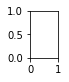

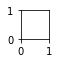

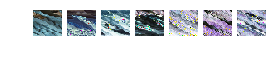

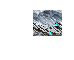

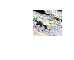

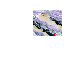

In [88]:
# plot clusters
for k in range(4):
    ind = where(code==k)[0]
    figure()
    gray()
    for i in range(minimum(len(ind),40)):
        subplot(4,10,i+1)
        imshow(immatrix[ind[i]].reshape((201,225,3)))
        axis('off')
show()